In the calculations of thermodynamic properties, only only the accuracy but also the precision is our concern. Bennett Acceptance Ration (BAR), which was proposed by Bennett in 1976, is a method that yield the free energy difference between two states with minimal variance. Not like in thermodynamic perturbation, BAR requires simulations for both states. Starting from the definition of free energy difference
\begin{align}
\Delta A&=\ln{\frac{Q_0}{Q_1}}\notag\\
      &=\ln{\frac{Q_0}{Q_1}\frac{\int W\exp{(-U_0-U_1)}d\mathbf{q}}{\int W\exp{(-U_0-U_1)}d\mathbf{q}}}\notag\\
      &=\ln{\left\{\frac{\int W\exp{(-U_0)}\exp{(-U_1)}d\mathbf{q}}{Q_1}\cdot\frac{Q_0}{\int W\exp{(-U_1)}\exp{(-U_0)}d\mathbf{q}}\right\}}\notag\\
      &=\ln{\frac{\left<W\exp{(-U_0)}\right>_1}{\left<W\exp{(-U_1)}\right>_0}},
\end{align}
where $W$ is an arbitrary normal weighting function. Optimization of the free energy estimate is most easily carried out in the limit of large sample sizes. Let the available data consist of $n_0$ statistically independent configurations from the $U_0$ ensemble and $n_1$ from the $U_1$ ensemble. Let the data be used in the above equation to obtain a finite-sample estimate of the reduced free energy difference $\Delta A$. Using the error propagation equation
$$
Var[y(x_1,x_2)]=\left(\frac{\partial y}{\partial x_1}\right)^2 Var(x_1) + \left(\frac{\partial y}{\partial x_2}\right)^2 Var(x_2),
$$
by assuming that $x_1$ and $x_2$ are independent, we have the variance of $\Delta A$
\begin{align*}
Var(\Delta A)&=\left(\frac{\partial \Delta A}{\partial Q_0}\right)^2 Var(Q_0)+\left(\frac{\partial \Delta A}{\partial Q_1}\right)^2 Var(Q_1)\\
         &=\left(\frac{1}{Q_0}\right)^2 Var(Q_0)+\left(-\frac{1}{Q_1}\right)^2 Var(Q_1)\\
         &=\left(\frac{1}{Q_0}\right)^2 Var(Q_0)+\left(\frac{1}{Q_1}\right)^2 Var(Q_1).
\end{align*}
With the definition of variance $Var(X)=\left<X^2\right>-\left<X\right>^2$, we have
\begin{align*}
Var(Q_0)&=Var\left(\left<W\exp{(-U_0)}\right>_1\right)\\
     &=Var\left(\frac{1}{n_1}\sum_{i=1}^{n_1}W_i\exp{(-U_0(i))}\right)\\
     &=\sum_{i=1}^{n_1}\left(\frac{1}{n_1}\right)^2Var\left\{W_i\exp{\left[-U_0(i)\right]}\right\}\\
     &=\frac{1}{n_1}Var\left\{W_i\exp{\left[-U_0(i)\right]}\right\}\\
     &=\frac{1}{n_1}\left\{\left<\left(W\exp{(-U_0)}\right)^2\right>_1-\left[\left<W\exp{(-U_0)}\right>_1\right]^2\right\}\\
     &=\frac{1}{n_1}\left\{\left<W^2\exp{(-2U_0)}\right>_1-\left[\left<W\exp{(-U_0)}\right>_1\right]^2\right\}
\end{align*}
With sufficiently large sample sizes, the error of this estimate will be nearly Gaussian, and its expected square is exactly the variance of $\Delta A$
\begin{align*}
Var\left(\Delta A_{est}-\Delta A\right)&\approx\frac{\left<W^2\exp{(-2U_1)}\right>_0}{n_0\left[\left<W\exp{\left(-U_1\right)}\right>_0\right]^2}+\frac{\left<W^2\exp{(-2U_0)}\right>_1}{n_1\left[\left<W\exp{\left(-U_0\right)}\right>_1\right]^2}-\frac{1}{n_0}-\frac{1}{n_1}\\
&=\frac{\int \left[(Q_0/n_0)\exp{(-U_1)+(Q_1/n_1)\exp{(-U_0)}}\right]W^2\exp{(-U_0-U_1)} d\mathbf{q}}{\left[\int W\exp{(-U_0-U_1)}d\mathbf{q}\right]^2}-\frac{1}{n_0}-\frac{1}{n_1}.
\end{align*}
To minimize it with respect to $W$, we find
$$
W=\mathit{const}\times\left(\frac{Q_0}{n_0}\exp{(-U_1)}+\frac{Q_1}{n_1}\exp{(-U_0)}\right)^{-1}.
$$

Substituting this into the definition of $\Delta A$ (please let me when equation numbering and references in Jupyter is available) yields
$$
\Delta A=\ln{\frac{Q_0}{Q_1}}=\ln{\frac{\left<f(U_0-U_1+C)\right>_1}{\left<f(U_1-U_0-C)\right>_0}}+C
$$
where
$$
C=\Delta A+\ln{\frac{n_1}{n_0}},
$$
and $f$ denotes the Fermi function
$$
f(x)=\frac{1}{1+\exp{(x)}}.
$$
Because $C$ and $\Delta A$ depend on each other, they must be solved iteratively.

In this script, we are going to calculate the free energy difference between two states.
State 0 has a Hamiltonian $H_0=(x+2.0)^2$ in one-dimensional space, and state 1 has a Hamiltonian $H_1=0.25(x-2.0)^2$. The free energy difference between these two states is
\begin{align*}
\Delta A&=\ln{\frac{\int \exp{(-H_0(\mathbf{x}))}d\mathbf{x}}{\int \exp{(-H_1(\mathbf{x}))}d\mathbf{x}}}\\
     &=\ln{\frac{\int \exp{(-(x+2.0)^2)}d\mathbf{x}}{\int \exp{(-0.25\times(x-2.0)^2)}d\mathbf{x}}}\\
     &=\ln{\frac{\sqrt{2\pi\times 0.5}}{\sqrt{2\pi\times 2}}}\\
     &=-0.69
\end{align*}

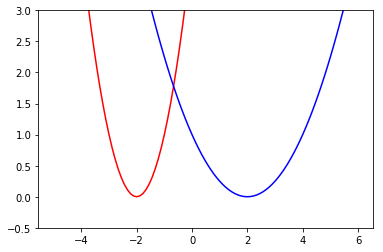

In [11]:
%matplotlib inline
from math import *
import numpy as np
import random
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
np.set_printoptions(precision=3)
def u0(x):
    return (x+2.0)**2
def u1(x):
    return 0.25*(x-2.0)**2
x=np.linspace(-5,6,100)
y0=u0(x)
y1=u1(x)
plt.ylim(-.5, 3)
plt.plot(x,y0,'r',x,y1,'b')
plt.show()

Because the barrier is much larger than 1 in a unit of kT, it is difficult for TP to find the converged correct answer. Next we will use BAR to get the free energy difference.

Now we define a Monte Carlo (MC) propagator for this simulation. 
In the MC simulation, the transition between states must satisfy the detailed balance, i.e.
$$\rho(x_i)P(x_i,x_j)=\rho(x_j)P(x_j,x_i),$$
where $\rho(x_i)$ and $P(x_i,x_j)$ are the probability of the microstate $x_i$ and the transition probability from $x_i$ to $x_j$, 
respectively.
Suppose at $t_0$ the system is located at microstate $x_0$ with energy u(x_0). We make a random trial move to $x_1^t$ with energy 
$u(x_1^t)$.

if $u(x_1^t)<u(x_1^t)$

  {
  $x_1=x_1^t$
  }
  
else

  {
   generate a random number $s$ evenly distributed in [0,1]
  
   if $s<e^{-[u(x_1^t)-u(x_1^t)]}$
  
   {
    $x_1=x_1^t$
    }
    
   else
  
   {
    $x_1=x_0$
   }
  }

In [12]:
def MCpropagator(x0,dx,N,dN,u):
    count = 0
    x = np.empty(N)
    xcurrent = x0
    while count <N:
        innercount = 0
        while innercount < dN:
            rnd = np.random.uniform(0.0,1.0)
            if rnd < 0.5:
                xtrial = xcurrent - dx
            else:
                xtrial = xcurrent + dx

            deltau = u(xtrial) - u(xcurrent)
            if deltau < 0.0:
                xcurrent = xtrial
            else:
                acceptanceratio = np.exp(-deltau)
                if acceptanceratio > np.random.uniform(0.0,1.0):
                    xcurrent = xtrial
                else:
                    xcurrent = xcurrent
            innercount = innercount + 1
        x[count]=xcurrent
        count = count + 1
    return x, count

Number of samples generated for H0:    5000
Number of samples generated for H1:   10000
The distribution of the samples looks like:


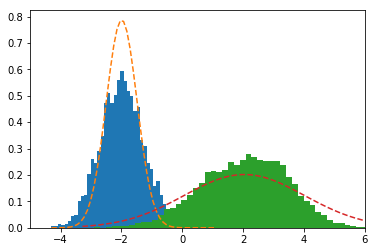

In [13]:
dx = 0.01
dN = 1600
N0 = 5000
x_init0 = -2.0
x0 = np.empty(N0)
x0, count0 = MCpropagator(x_init0,dx,N0,dN,u0)
print('Number of samples generated for H0:%8d' %count0)
prob0, bins0, patches0 = plt.hist(x0, bins=50, density=True)
mean0 = np.mean(x0)
variance0 = np.var(x0)
npdf0 = scipy.stats.norm.pdf(bins0,mean0,variance0)
plt.plot(bins0, npdf0, '--')

N1 = 10000
x_init1 = 2.0
x1 = np.empty(N0)
x1, count1 = MCpropagator(x_init1,dx,N1,dN,u1)
print('Number of samples generated for H1:%8d' %count1)

prob1, bins1, patches1 = plt.hist(x1, bins=50, density=True)
mean1 = np.mean(x1)
variance1 = np.var(x1)
npdf1 = scipy.stats.norm.pdf(bins1,mean1,variance1)
plt.plot(bins1, npdf1, '--')

print('The distribution of the samples looks like:')
plt.xlim(-5,6)
plt.show()

With these microstates sampled under $H_0$ and $H_1$, we calculate the free energy difference.

In [14]:
def fermi(x):
    return 1.0/(1+np.exp(x))

In [15]:
def BAR(u00,u11,u01,u10,count0,count1,deltaA=0.0,maxcycle=100,converg=1.E-4):
    icycle = 1
    while icycle <maxcycle:
        deltaA0=deltaA
        c=deltaA+log(float(count1)/count0)
        f0=fermi(u01-u00-c)
        f1=fermi(u10-u11+c)
        f0mean = np.mean(f0)
        f1mean = np.mean(f1)
        deltaA=log(f1mean/f0mean)+c
        print('Cycle %d: Delta A=%5.2f' %(icycle, deltaA))
        if np.abs(deltaA0-deltaA)<converg:
            print("Convergence has reached")
            return deltaA
        icycle += 1
    print("max cyclc reached. Return with nonconverged result")
    return deltaA

In [16]:
u00=u0(x0)
u11=u1(x1)
u01=u1(x0)
u10=u0(x1)
deltaA=0.0
deltaA=BAR(u00,u11,u01,u10,count0,count1,0.0,100)
print('The free energy difference from a BAR calculation is %8.2f' % (deltaA))
print('The free energy difference from a forward TP calculation is %8.2f' % (-np.log(np.mean(np.exp(u00-u01)))))
print('The free energy difference from a backward TP calculation is %8.2f' % (np.log(np.mean(np.exp(u11-u10)))))

Cycle 1: Delta A=-0.67
Cycle 2: Delta A=-0.68
Cycle 3: Delta A=-0.68
Cycle 4: Delta A=-0.68
Convergence has reached
The free energy difference from a BAR calculation is    -0.68
The free energy difference from a forward TP calculation is    -1.03
The free energy difference from a backward TP calculation is    -0.43


In the following, we will use another sampling method termed stratified sampling. In this method, we first introduce a series of intermediate states with a Hamiltonian $H_\lambda=\lambda H_1+(1-\lambda)H_0,\, \lambda \in (0,1)$. When $\lambda=0,\, H_\lambda=H_0$. And $H_\lambda=H_1$, when $\lambda=1$. The function for $H_\lambda$ is:

In [17]:
def ulmbd(lamb,x):
    return (1-lamb)*u0(x)+lamb*u1(x)

We can plot the potential energy surfaces


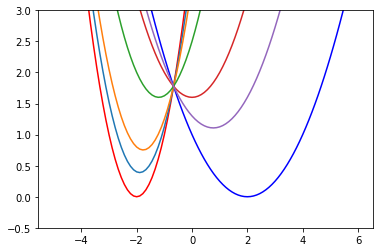

In [18]:
x=np.linspace(-5,6,100)
y0=ulmbd(0.0,x)
y1=ulmbd(0.1,x)
y2=ulmbd(0.2,x)
y5=ulmbd(0.5,x)
y8=ulmbd(0.8,x)
y9=ulmbd(0.9,x)
yN=ulmbd(1.0,x)
plt.ylim(-.5, 3)
plt.plot(x,y0,'r')
plt.plot(x,yN,'b')
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y5)
plt.plot(x,y8)
plt.plot(x,y9)
plt.show()

The free energy difference between $H_0$ and $H_1$ can be written as the sum of the free energy difference between each pair of neighboring states, i.e.
$$\Delta A_{0\rightarrow 1}=\sum\limits_{i=0}^{N-1}\Delta A_{\lambda_i\rightarrow \lambda_{i+1}}$$
We keep the total number of samples fixed and evenly distribute the samples to each simulation under $H_\lambda$.

In [19]:
def MCpropagator2(x0,dx,N,dN,ulmbd,lamb):
    count = 0
    x = np.empty(N)
    xcurrent = x0
    while count < N:
        innercount = 0
        while innercount < dN:
            rnd = np.random.uniform(0.,1.)
            if rnd<0.5:
                xtrial = xcurrent - dx
            else:
                xtrial = xcurrent + dx

            deltau = ulmbd(lamb,xtrial) - ulmbd(lamb,xcurrent)
            if deltau < 0:
                xcurrent = xtrial
            else:
                acceptanceratio = np.exp(-deltau)
                if acceptanceratio > np.random.uniform(0.0,1.0):
                    xcurrent = xtrial
                else:
                    xcurrent = xcurrent
            innercount = innercount + 1
        x[count] = xcurrent
        count = count + 1
    return x, count

def TP2(x,ulmbd,lmbd1,lmbd2):
    edu=np.zeros(x.size)
    edu = np.exp(-(ulmbd(lmbd2,x)-ulmbd(lmbd1,x)))
    S = np.mean(edu)
    varS = np.var(edu)/x.size
    deltaA = -np.log(S)
    varA = varS/S**2
    return deltaA, varA

The free energy difference from lambda 0.00 to lambda 0.10 is     0.35 +-  0.00
The free energy difference from lambda 0.10 to lambda 0.20 is     0.34 +-  0.01
The free energy difference from lambda 0.20 to lambda 0.30 is     0.29 +-  0.01
The free energy difference from lambda 0.30 to lambda 0.40 is     0.21 +-  0.01
The free energy difference from lambda 0.40 to lambda 0.50 is     0.11 +-  0.01
The free energy difference from lambda 0.50 to lambda 0.60 is     0.01 +-  0.01
The free energy difference from lambda 0.60 to lambda 0.70 is    -0.14 +-  0.01
The free energy difference from lambda 0.70 to lambda 0.80 is    -0.35 +-  0.02
The free energy difference from lambda 0.80 to lambda 0.90 is    -0.47 +-  0.02
The free energy difference from lambda 0.90 to lambda 1.00 is    -0.96 +-  0.03

The total free energy difference is    -0.59 +-  0.05


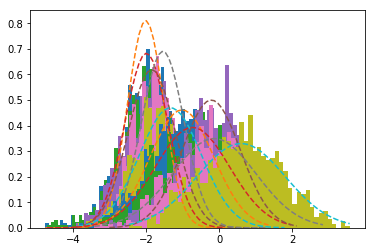

In [20]:
dx = 0.01
N=10000
dlambda = 0.1
lambs = np.arange(0.0,1.,dlambda)
lambs = np.append(lambs,[1.0])
Ns = N//(len(lambs)-1)
deltaA = np.zeros(len(lambs)-1)
varA = np.zeros(len(lambs)-1)
i = 0
for i in range(len(lambs)-1):
    x0 = -1.5 + 3.0*i*dlambda
    x = np.empty(Ns)
    x, count = MCpropagator2(x0,dx,Ns,dN,ulmbd,lambs[i])
#    print('Number of samples generated:%8d for lambda= %5.2f' %(count,lambs[i]))
    prob, bins, patches = plt.hist(x, bins=50, density=True)
    mean = np.mean(x)
    variance = np.var(x)
    npdf = scipy.stats.norm.pdf(bins,mean,variance)
    plt.plot(bins, npdf, '--')
    deltaA[i], varA[i] = TP2(x,ulmbd,lambs[i],lambs[i+1])
    print('The free energy difference from lambda %4.2f to lambda %4.2f is %8.2f +- %5.2f' % (lambs[i],lambs[i+1],deltaA[i], np.sqrt(varA[i])))

print('')
print('The total free energy difference is %8.2f +- %5.2f' %(np.sum(deltaA),np.sqrt(np.sum(varA))))
plt.show()